In [1]:
import pandas as pd

# Load a dataset
df = pd.read_csv(r"C:\Project_Guvi\MDE93\healthcare_reviews.csv")

#  first few rows of the dataset
print("First Five row of Dataset")
print(df.head())

# Check for missing values
print("\nMissing Values")
print(df.isnull().sum())

# Shape of dataset
print("\nShape of Dataset:",df.shape)

#
print("\nUnique Value in Column:")
print(df.nunique())

#info
print("\n information of Dataset")
print(df.info())


First Five row of Dataset
                                         Review_Text  Rating
0        I have mixed feelings about my experience.        4
1  The staff was caring and attentive. I couldn't...       5
2        I have mixed feelings about my experience.        5
3        I have mixed feelings about my experience.        5
4  The healthcare provider was excellent. I had a...       3

Missing Values
Review_Text    100
Rating           0
dtype: int64

Shape of Dataset: (1000, 2)

Unique Value in Column:
Review_Text    9
Rating         5
dtype: int64

 information of Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review_Text  900 non-null    object
 1   Rating       1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB
None


In [3]:
# drop missing value in review_text column
df = df.dropna(subset=['Review_Text'])

Rating Column Overview Rating
1    175
2    190
3    147
4    196
5    192
Name: count, dtype: int64


<Axes: xlabel='Rating'>

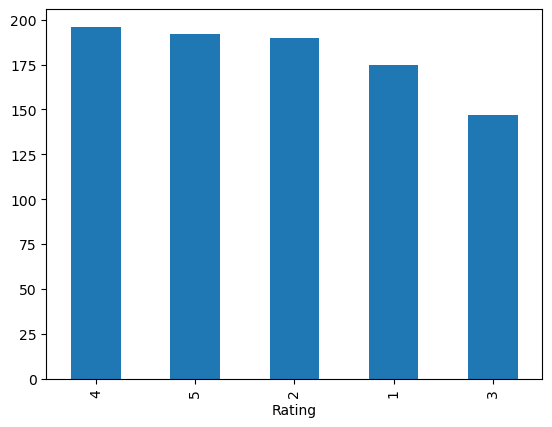

In [5]:
print(f"Rating Column Overview {df['Rating'].value_counts().sort_index()}")
df['Rating'].value_counts().plot(kind='bar')

### Sentiment Classification Based on Ratings

- **Rating > 3**: Classified as **Positive** sentiment.
- **Rating = 3**: Classified as **Neutral** sentiment.
- **Rating < 3**: Classified as **Negative** sentiment.

In [7]:
# Define a function to categorize ratings into sentiment labels
def sentiment_label(rating):
    if rating >= 4:
        return 1 #Positive
    elif rating == 3:
        return 0 #neutral
    else:
        return -1 # negative

# Apply the function to create a new column 'Sentiment'
df['Sentiment'] = df['Rating'].apply(sentiment_label)

Sentiment Column Overview Sentiment
-1    365
 0    147
 1    388
Name: count, dtype: int64


<Axes: xlabel='Sentiment'>

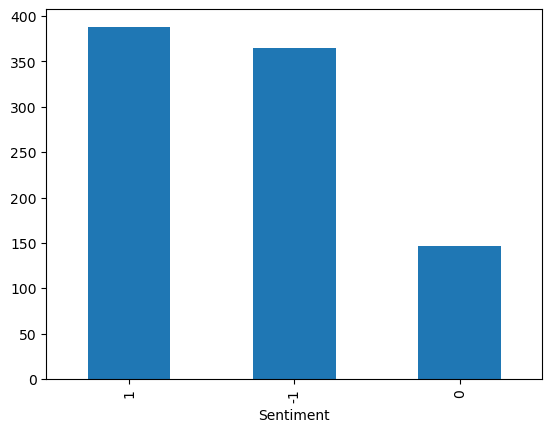

In [9]:
print(f"Sentiment Column Overview {df['Sentiment'].value_counts().sort_index()}")
df['Sentiment'].value_counts().plot(kind='bar')

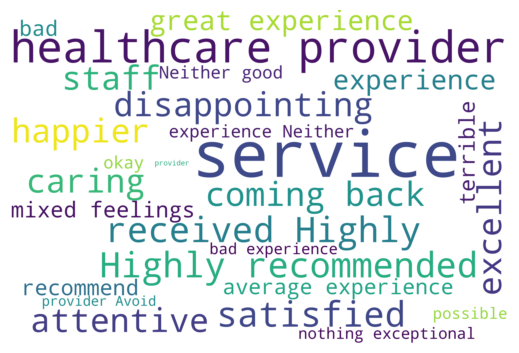

In [11]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
     
#sentiment_p= input_data[input_data.sentiment==1.0]
sentiment_p_text = df['Review_Text'].values
len(sentiment_p_text)

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(sentiment_p_text))

fig = plt.figure(
    figsize = (5, 5),
    facecolor = 'w',
    edgecolor = 'w')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Data Preprocessing

In [13]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize lDemmatizer
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Function to clean and preprocess text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize text
    words = word_tokenize(text)
    # Remove stopwords and lemmatize
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

# Apply preprocessing to the Review_Text column
df['Cleaned_Review_Text'] = df['Review_Text'].apply(preprocess_text)

# Inspect the cleaned text
print(df[['Review_Text', 'Cleaned_Review_Text']].head())


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yuvar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yuvar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\yuvar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                         Review_Text  \
0        I have mixed feelings about my experience.    
1  The staff was caring and attentive. I couldn't...   
2        I have mixed feelings about my experience.    
3        I have mixed feelings about my experience.    
4  The healthcare provider was excellent. I had a...   

                              Cleaned_Review_Text  
0                        mixed feeling experience  
1          staff caring attentive couldnt happier  
2                        mixed feeling experience  
3                        mixed feeling experience  
4  healthcare provider excellent great experience  


In [15]:
df.head()

,Review_Text,Rating,Sentiment,Cleaned_Review_Text
0,I have mixed feelings about my experience.,4,1,mixed feeling experience
1,The staff was caring and attentive. I couldn't...,5,1,staff caring attentive couldnt happier
2,I have mixed feelings about my experience.,5,1,mixed feeling experience
3,I have mixed feelings about my experience.,5,1,mixed feeling experience
4,The healthcare provider was excellent. I had a...,3,0,healthcare provider excellent great experience


In [17]:
df.to_csv("C:\Project_Guvi\MDE93\healthcare_reviews_cleaned_dataset.csv",index=False)

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000,ngram_range=(1, 2))

# Apply TF-IDF transformation
X = tfidf.fit_transform(df['Cleaned_Review_Text'])

# Convert to DataFrame for easier inspection
X_tfidf = pd.DataFrame(X.toarray(), columns=tfidf.get_feature_names_out())

In [21]:
import joblib
# Save the TF-IDF Vectorizer
joblib.dump(tfidf,'C:\\Project_Guvi\\MDE93\\tfidf_vectorizer.pkl')


['C:\\Project_Guvi\\MDE93\\tfidf_vectorizer.pkl']

Model Building

#### KNN Classifier

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

# Define X and y
X = X_tfidf
y = df['Sentiment']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y,random_state=42)

# Initialize KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)  

# Train the classifier
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=1)
cm = confusion_matrix(y_test, y_pred)

# Output results
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")
print(f"Confusion Matrix:\n{cm}")


Accuracy: 0.37037037037037035
Classification Report:
              precision    recall  f1-score   support

          -1       0.41      0.59      0.48       110
           0       0.15      0.09      0.11        44
           1       0.37      0.27      0.31       116

    accuracy                           0.37       270
   macro avg       0.31      0.32      0.30       270
weighted avg       0.35      0.37      0.35       270

Confusion Matrix:
[[65  7 38]
 [25  4 15]
 [70 15 31]]


KNN Classifier with SMOTE

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
import numpy as np

# Define X and y
X = X_tfidf
y = df['Sentiment']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42,
                                                    stratify=y)

# Initialize SMOTE for oversampling the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize KNN Classifier
knn = KNeighborsClassifier()

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_neighbors': np.arange(2,20,1) ,
    'weights': ['uniform', 'distance'],
}

# Setup GridSearchCV with KNN
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Train the model using GridSearchCV
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best estimator
best_knn = grid_search.best_estimator_

# Make predictions
y_pred = best_knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=1)
cm = confusion_matrix(y_test, y_pred)

# Output results
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")
print(f"Confusion Matrix:\n{cm}")


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'n_neighbors': 2, 'weights': 'uniform'}
Accuracy: 0.3851851851851852
Classification Report:
              precision    recall  f1-score   support

          -1       0.42      0.72      0.53       110
           0       0.18      0.18      0.18        44
           1       0.47      0.15      0.22       116

    accuracy                           0.39       270
   macro avg       0.36      0.35      0.31       270
weighted avg       0.40      0.39      0.34       270

Confusion Matrix:
[[79 16 15]
 [32  8  4]
 [78 21 17]]


Random Forest Model

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from imblearn.over_sampling import SMOTE

# Define X and y
X = X_tfidf
y = df['Sentiment']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=0,stratify=y)

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the Random Forest model
model = RandomForestClassifier(random_state=42, n_jobs=-1)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],           # Number of trees 
    'max_depth': [10, 20, 30],              # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],          # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],            # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False],               # Whether bootstrap samples are used when building trees
    'max_features': ['sqrt', 'log2', None]    # Number of features to consider for best split
}

# Set up StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, n_jobs=-1, verbose=1)

# Train the model using GridSearchCV
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best estimator
best_model = grid_search.best_estimator_

# Make predictions 
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=1)
cm = confusion_matrix(y_test, y_pred)

# Output results
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")
print(f"Confusion Matrix:\n{cm}")


Fitting 5 folds for each of 486 candidates, totalling 2430 fits
Best Parameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.3888888888888889
Classification Report:
              precision    recall  f1-score   support

          -1       0.42      0.60      0.49       110
           0       0.22      0.27      0.24        44
           1       0.47      0.23      0.31       116

    accuracy                           0.39       270
   macro avg       0.37      0.37      0.35       270
weighted avg       0.41      0.39      0.37       270

Confusion Matrix:
[[66 20 24]
 [25 12  7]
 [66 23 27]]


LogisticRegression Model

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE

# Define X and y
X = X_tfidf
y = df['Sentiment']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=0,stratify=y)

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the Logistic Regression model
logreg = LogisticRegression(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10],          # Regularization parameter
    'solver': ['liblinear', 'saga'], # Solvers for logistic regression
    'max_iter': [100, 200, 300]       # Number of iterations for convergence
}

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Train the model using GridSearchCV
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best estimator
best_logreg_model = grid_search.best_estimator_

# Make predictions
y_pred = best_logreg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=1)
cm = confusion_matrix(y_test, y_pred)

# Output results
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")
print(f"Confusion Matrix:\n{cm}")


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'C': 0.01, 'max_iter': 100, 'solver': 'liblinear'}
Accuracy: 0.35555555555555557
Classification Report:
              precision    recall  f1-score   support

          -1       0.45      0.40      0.42        73
           0       0.17      0.34      0.23        29
           1       0.44      0.32      0.37        78

    accuracy                           0.36       180
   macro avg       0.35      0.35      0.34       180
weighted avg       0.40      0.36      0.37       180

Confusion Matrix:
[[29 21 23]
 [10 10  9]
 [25 28 25]]


In [31]:
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV

# Define X and y
X = X_tfidf
y = df['Sentiment']

# Split the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=0,stratify=y)

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the Multinomial Naive Bayes model
nb_model = MultinomialNB()

# Define the parameter grid for alpha (smoothing parameter)
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 1.5, 2.0]
}

# Initialize GridSearchCV with Multinomial Naive Bayes
grid_search = GridSearchCV(estimator=nb_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Train the model using GridSearchCV on the resampled training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best estimator
best_nb_model = grid_search.best_estimator_

# Make predictions 
y_pred = best_nb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=1)
cm = confusion_matrix(y_test, y_pred)

# Output results
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")
print(f"Confusion Matrix:\n{cm}")


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Parameters: {'alpha': 0.1}
Accuracy: 0.37037037037037035
Classification Report:
              precision    recall  f1-score   support

          -1       0.40      0.46      0.43       110
           0       0.22      0.27      0.24        44
           1       0.43      0.32      0.36       116

    accuracy                           0.37       270
   macro avg       0.35      0.35      0.35       270
weighted avg       0.38      0.37      0.37       270

Confusion Matrix:
[[51 20 39]
 [21 12 11]
 [56 23 37]]


**Reason for Low Metrics:**
- Imbalanced Data: Too many reviews of one sentiment type bias the model.
- Conflicting Ratings: Different ratings for the same review confuse the model.
- Limited Training Data: A small dataset reduces the model's ability to generalize effectively.

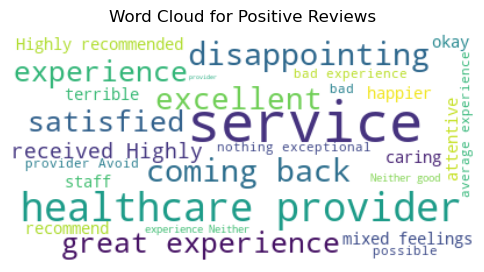

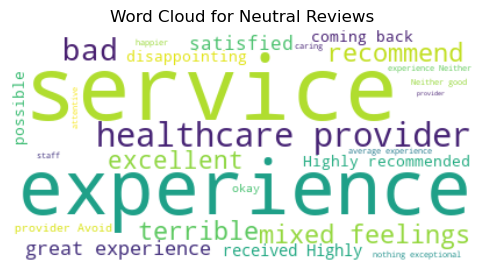

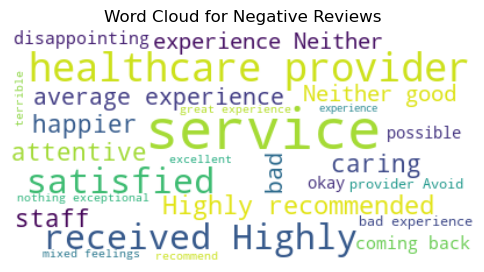

In [33]:
# Word Cloud for Positive, Neutral, and Negative Reviews
def generate_wordcloud(sentiment_label, df):
    text = " ".join(review for review in df[df['Sentiment'] == sentiment_label]['Review_Text'])
    wordcloud = WordCloud(background_color='white', max_words=100, contour_width=3, contour_color='steelblue').generate(text)
    plt.figure(figsize=(6, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    sentiment_map = {1: "Positive", 0: "Neutral", -1: "Negative"}
    plt.title(f"Word Cloud for {sentiment_map[sentiment_label]} Reviews")
    plt.show()

# Generate word clouds for each sentiment
generate_wordcloud(1, df)   # Positive reviews
generate_wordcloud(0, df)   # Neutral reviews
generate_wordcloud(-1, df)  # Negative reviews


In [35]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Load your dataset
df = pd.read_csv('C:\Project_Guvi\MDE93\healthcare_cleaned_dataset.csv')  

# Create a function to extract word counts for each sentiment
def word_count_by_sentiment(df, sentiment_label):
    sentiment_texts = df[df['Sentiment'] == sentiment_label]['Review_Text']  # Filter by sentiment
    
    # Check if there are any reviews for the sentiment
    if sentiment_texts.empty:
        return pd.DataFrame(columns=['Word', 'Count'])

    vectorizer = CountVectorizer(stop_words='english')  # Exclude stopwords
    word_count = vectorizer.fit_transform(sentiment_texts)  # Get word counts

    # Sum up the word counts and associate with feature names
    word_count_sum = word_count.sum(axis=0) 
    word_freq = [(word, word_count_sum[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    word_freq = sorted(word_freq, key=lambda x: x[1], reverse=True)  # Sort by frequency

    return pd.DataFrame(word_freq[:10], columns=['Word', 'Count'])  # Return top 10 as DataFrame

# 1. Get top words for Positive, Neutral, and Negative reviews
top_positive_words = word_count_by_sentiment(df, 1)  # For positive sentiment
top_neutral_words = word_count_by_sentiment(df, 0)   # For neutral sentiment
top_negative_words = word_count_by_sentiment(df, -1)  # For negative sentiment

# Display the results 
print("Top Words in Positive Reviews:")
print(top_positive_words)

print("\nTop Words in Neutral Reviews:")
print(top_neutral_words)

print("\nTop Words in Negative Reviews:")
print(top_negative_words)


Top Words in Positive Reviews:
            Word  Count
0     experience    209
1        service    136
2       provider    127
3     healthcare     86
4            bad     76
5  disappointing     50
6            won     50
7         coming     50
8      excellent     48
9          great     48

Top Words in Neutral Reviews:
         Word  Count
0  experience     87
1    provider     54
2     service     47
3  healthcare     34
4         bad     28
5       mixed     20
6    feelings     20
7    terrible     20
8   recommend     20
9   excellent     19

Top Words in Negative Reviews:
          Word  Count
0   experience    186
1      service    131
2     provider    109
3          bad     80
4   healthcare     73
5    satisfied     54
6     received     54
7       highly     54
8  recommended     54
9        staff     48


In [37]:
import joblib
joblib.dump(best_model,'C:\\Project_Guvi\\MDE93\\random_forest_model.pkl')


['C:\\Project_Guvi\\MDE93\\random_forest_model.pkl']

In [39]:
import joblib
import pandas as pd

# Load the saved TF-IDF vectorizer and Random Forest model
tfidf_vectorizer = joblib.load('C:\\Project_Guvi\\MDE93\\tfidf_vectorizer.pkl')
rf_model = joblib.load('C:\\Project_Guvi\\MDE93\\random_forest_model.pkl')

# New reviews to be tested
new_reviews = [
    "This hospital provided excellent service and care.",
    "I had a terrible experience with the staff; they were unhelpful and rude."
]

# Transform the new reviews using the loaded TF-IDF vectorizer
X_new_reviews = tfidf_vectorizer.transform(new_reviews)

# Convert the transformed reviews into a DataFrame
X_new_reviews_df = pd.DataFrame(X_new_reviews.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Now predict the sentiment of the new reviews
y_pred_new_reviews = rf_model.predict(X_new_reviews_df)

# Mapping from numerical predictions to sentiment labels
sentiment_mapping = {1: "\033[1mPositive\033[0m", 0:  "\033[1mNeutral\033[0m", -1: "\033[1mNegative\033[0m"}

# Output the predictions with sentiment labels
for review, prediction in zip(new_reviews, y_pred_new_reviews):
    sentiment = sentiment_mapping.get(prediction, "Unknown")  # Default to "Unknown" for unexpected values
    print(f"Review: \"{review}\" - Predicted Sentiment: {sentiment}")


Review: "This hospital provided excellent service and care." - Predicted Sentiment: Positive
Review: "I had a terrible experience with the staff; they were unhelpful and rude." - Predicted Sentiment: Neutral
